## Import Dependencies

In [1]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 

/opt/anaconda3/envs/PhotogradeML/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.__version__

'1.13.1'

## Clone YOLOv3 Repo

In [3]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 159 (delta 0), reused 1 (delta 0), pack-reused 156
Receiving objects: 100% (159/159), 12.75 MiB | 8.46 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [4]:
## Custom dataset with new data is placed into YoloV3/data/customdata

In [10]:
pwd

'/Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset'

In [11]:
%cd YoloV3

/Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/YoloV3


In [12]:
!mkdir weights

In [32]:
%cd weights

/Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/YoloV3/weights


In [27]:
!wget https://drive.google.com/file/d/1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus
## Downloaded manually

--2023-03-23 17:29:08--  https://drive.google.com/file/d/1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus
Resolving drive.google.com (drive.google.com)... 2404:6800:4007:812::200e, 216.58.196.174
Connecting to drive.google.com (drive.google.com)|2404:6800:4007:812::200e|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/file/d/1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus/ [following]
--2023-03-23 17:29:08--  https://drive.google.com/file/d/1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus/
Reusing existing connection to [drive.google.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://www.google.com/sorry/index?continue=https://drive.google.com/file/d/1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus/&q=EhAkBQIB0AMA7NG1ykABGVG1GIz-8KAGIjCtei5O4-tnwLPRCgcXbEwQqzuSAsJS2I45VTY3Tjy3q32VpbOgwwyiT7h3A36jEDAyAXI [following]
--2023-03-23 17:29:09--  https://www.google.com/sorry/index?continue=https://drive.google.com/file/d/1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus/&q=

## Train on Custom Dataset

In [33]:
%cd ..

/Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/YoloV3


In [38]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 20 --nosave

Namespace(epochs=20, batch_size=10, accumulate=4, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CPU

Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2923 found, 131 missing, 38 empty, 0 duplicate, for 3092 images)
Caching images (1.7GB): 100%|██████████████| 3092/3092 [00:06<00:00, 502.33it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 duplicate, for 318 images): 10
Caching images (0.1GB): 100%|████████████████| 318/318 [00:01<00:00, 225.08it/s]
Image sizes 512 - 512 train, 512 test
Using 8 dataloader workers
Starting training for 20 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets 

     19/19        0G      1.85      1.04     0.156      3.05         7       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       318  1.53e+03     0.582     0.684     0.556     0.628
20 epochs completed in 10.607 hours.



## Process Sample Video

In [40]:
!python detect.py --conf-thres 0.3 --source "/Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4" --output out_out

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='/Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4', output='out_out', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/opt/anaconda3/envs/PhotogradeML/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525849783/work/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
video 1/1 (1/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.160s)
video 1

video 1/1 (53/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 4 vests, Done. (0.112s)
video 1/1 (54/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 4 vests, Done. (0.117s)
video 1/1 (55/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 4 vests, Done. (0.118s)
video 1/1 (56/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 4 vests, 1 bootss, Done. (0.116s)
video 1/1 (57/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 4 vests, 1 bootss, Done. (0.114s)
video 1/1 (58/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 4 vests, 1 bootss, Done. (0.123s)
video 1/1 (59/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_Cu

video 1/1 (107/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.122s)
video 1/1 (108/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.122s)
video 1/1 (109/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.115s)
video 1/1 (110/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.114s)
video 1/1 (111/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.118s)
video 1/1 (112/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.115s)
video 1/1 (113/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.118s)
video 1/1 (114/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_Cust

video 1/1 (169/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.125s)
video 1/1 (170/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.130s)
video 1/1 (171/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.134s)
video 1/1 (172/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.137s)
video 1/1 (173/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.141s)
video 1/1 (174/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.141s)
video 1/1 (175/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 Done. (0.146s)
video 1/1 (176/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVi

video 1/1 (232/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.138s)
video 1/1 (233/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.140s)
video 1/1 (234/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.156s)
video 1/1 (235/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.146s)
video 1/1 (236/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.138s)
video 1/1 (237/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.146s)
video 1/1 (238/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.131s)
video 1/1 (23

video 1/1 (291/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.118s)
video 1/1 (292/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.120s)
video 1/1 (293/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 1 vests, Done. (0.123s)
video 1/1 (294/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 1 vests, Done. (0.114s)
video 1/1 (295/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 1 vests, Done. (0.115s)
video 1/1 (296/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 1 vests, Done. (0.113s)
video 1/1 (297/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats

video 1/1 (348/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 1 vests, Done. (0.123s)
video 1/1 (349/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 1 vests, Done. (0.120s)
video 1/1 (350/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 1 vests, Done. (0.115s)
video 1/1 (351/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 1 vests, Done. (0.114s)
video 1/1 (352/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.120s)
video 1/1 (353/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 1 vests, Done. (0.122s)
video 1/1 (354/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x51

video 1/1 (405/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.122s)
video 1/1 (406/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.116s)
video 1/1 (407/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.115s)
video 1/1 (408/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.120s)
video 1/1 (409/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.116s)
video 1/1 (410/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.114s)
video 1/1 (411/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 vests, Done. (0.119s)
video 1/1 (412/733) /Users/abhinav

video 1/1 (462/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.150s)
video 1/1 (463/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.133s)
video 1/1 (464/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.125s)
video 1/1 (465/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.125s)
video 1/1 (466/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.126s)
video 1/1 (467/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.140s)
video 1/1 (468/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, Done. (0.121s)
video 1/1 (46

video 1/1 (520/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 bootss, Done. (0.120s)
video 1/1 (521/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 bootss, Done. (0.119s)
video 1/1 (522/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 bootss, Done. (0.119s)
video 1/1 (523/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 bootss, Done. (0.118s)
video 1/1 (524/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 bootss, Done. (0.119s)
video 1/1 (525/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 bootss, Done. (0.120s)
video 1/1 (526/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 bootss, Done. (0.118s)
video 1/1 (527/733) /Users/

video 1/1 (578/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 2 vests, Done. (0.117s)
video 1/1 (579/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 2 vests, Done. (0.120s)
video 1/1 (580/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 2 vests, 1 masks, Done. (0.121s)
video 1/1 (581/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 2 vests, 1 masks, Done. (0.123s)
video 1/1 (582/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 2 vests, Done. (0.123s)
video 1/1 (583/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 1 hardhats, 2 vests, Done. (0.125s)
video 1/1 (584/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomD

video 1/1 (630/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.120s)
video 1/1 (631/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.124s)
video 1/1 (632/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.118s)
video 1/1 (633/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.123s)
video 1/1 (634/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.119s)
video 1/1 (635/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.119s)
video 1/1 (636/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo

video 1/1 (684/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.111s)
video 1/1 (685/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.115s)
video 1/1 (686/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.117s)
video 1/1 (687/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.114s)
video 1/1 (688/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.113s)
video 1/1 (689/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo.mp4: 320x512 2 hardhats, 1 vests, Done. (0.114s)
video 1/1 (690/733) /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/SampleVideo

## Process Custom Collected Images

In [41]:
!python detect.py --conf-thres 0.3 --source "/Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/custom_newdata" --output out_images

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='/Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/custom_newdata', output='out_images', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/opt/anaconda3/envs/PhotogradeML/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525849783/work/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/60 /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/custom_newdata/boots1.jpeg: 512x384 2 bootss, Done. 

image 53/60 /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/custom_newdata/vest2.jpeg: 512x448 1 vests, Done. (0.176s)
image 54/60 /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/custom_newdata/vest3.jpeg: 512x512 1 vests, Done. (0.199s)
image 55/60 /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/custom_newdata/vest4.jpeg: 512x384 Done. (0.147s)
image 56/60 /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/custom_newdata/vest5.jpeg: 512x384 1 vests, Done. (0.146s)
image 57/60 /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/custom_newdata/vest6.jpeg: 384x512 1 vests, Done. (0.150s)
image 58/60 /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/custom_newdata/vest7.jpeg: 512x448 1 vests, Done. (0.166s)
image 59/60 /Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/custom_newdata/vest8.jpeg: 512x384 Done. (0.149s)
image 60/60 /Users/abhinavpujahari/Doc

## Sample Results

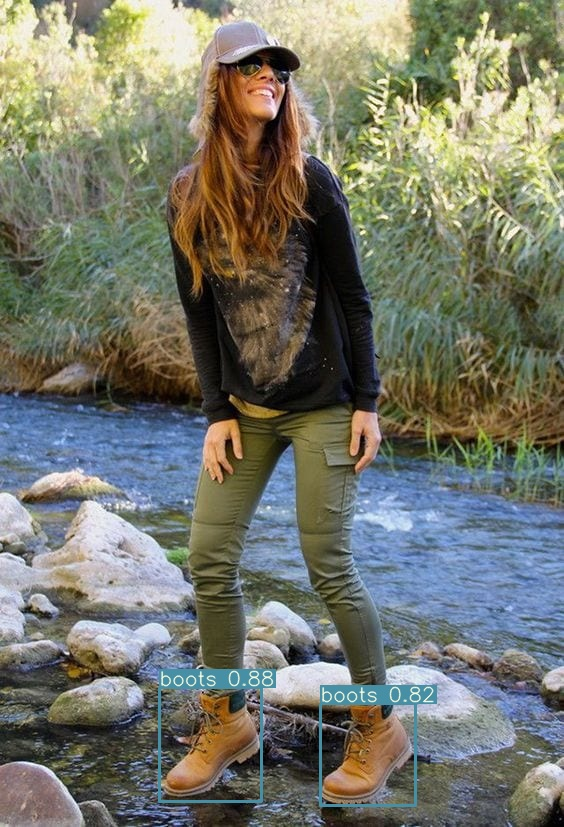

In [43]:
Image(filename='/Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/YoloV3/out_images/boots6.jpeg', width=480)

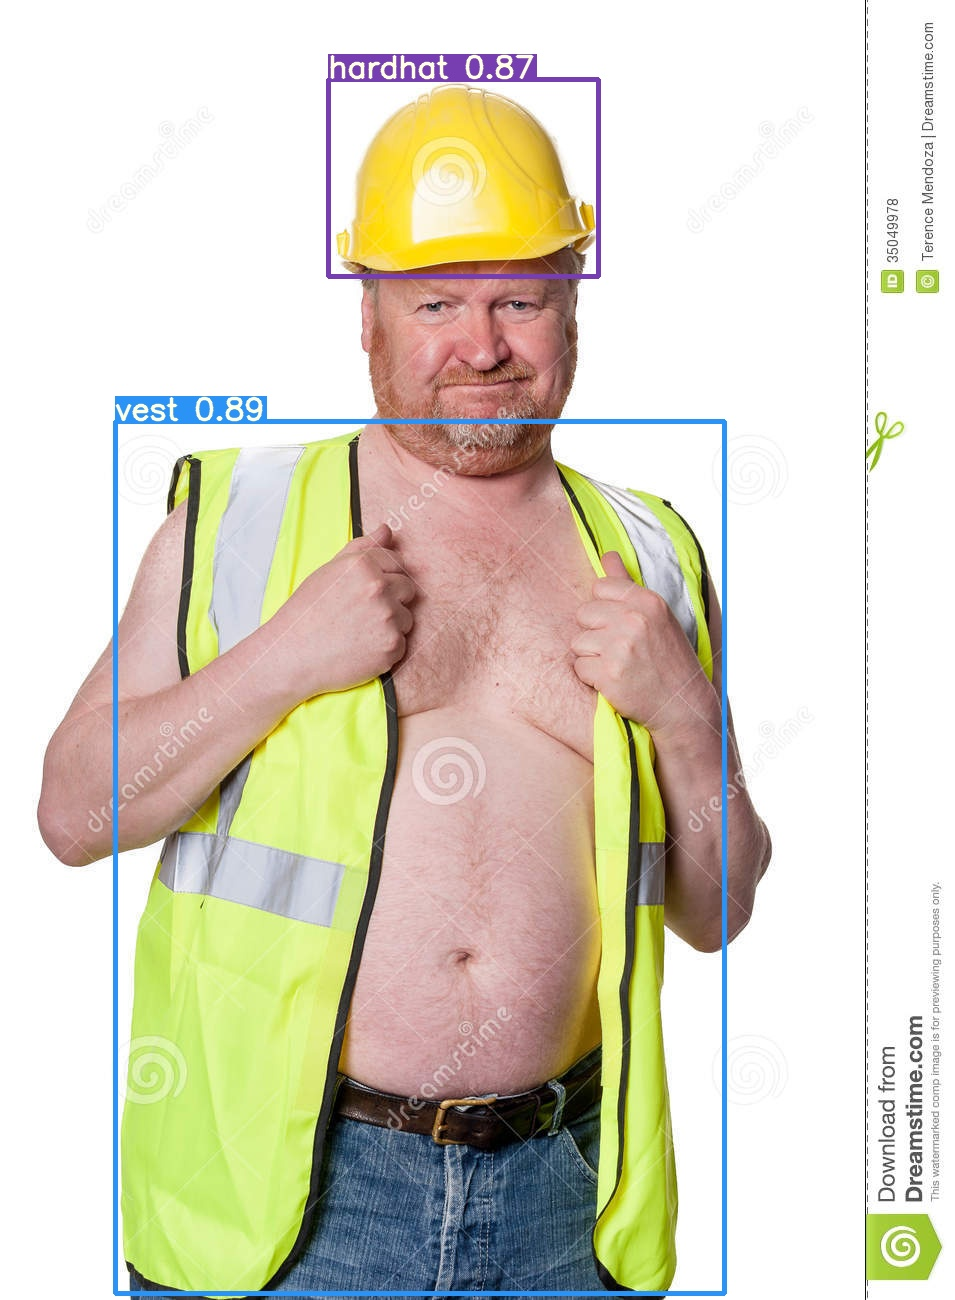

In [44]:
Image(filename='/Users/abhinavpujahari/Documents/EVA8/Session12/YOLOv3_CustomDataset/YoloV3/out_images/hardhat11.jpeg', width=480)